In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv("Dingling.csv")
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [3]:
data["date"] = pd.to_datetime(data[['year','month','day']])
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01


In [4]:
data["day_of_week"] = pd.DatetimeIndex(data["date"]).dayofweek
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,day_of_week
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01,4
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01,4
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01,4
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01,4
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01,4


## *Missingness Matrix*

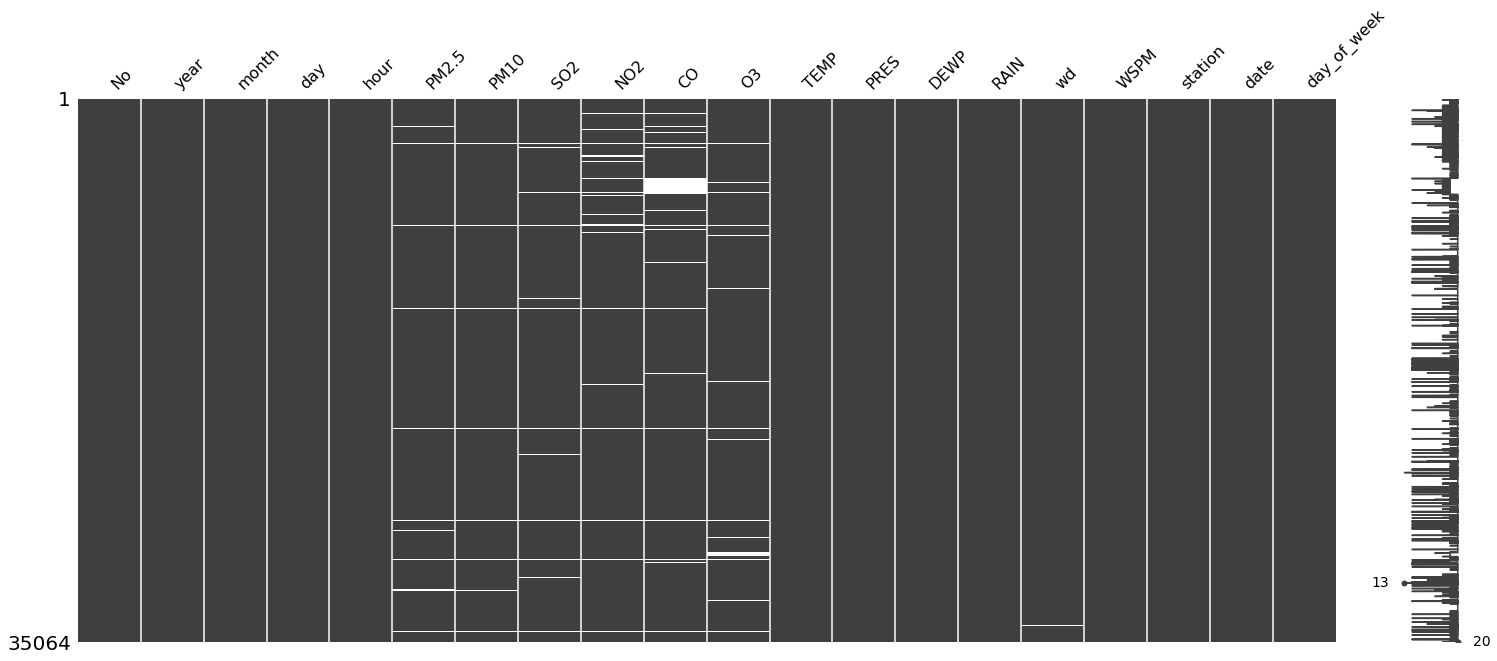

In [5]:
msno.matrix(data)

## *Histogram*

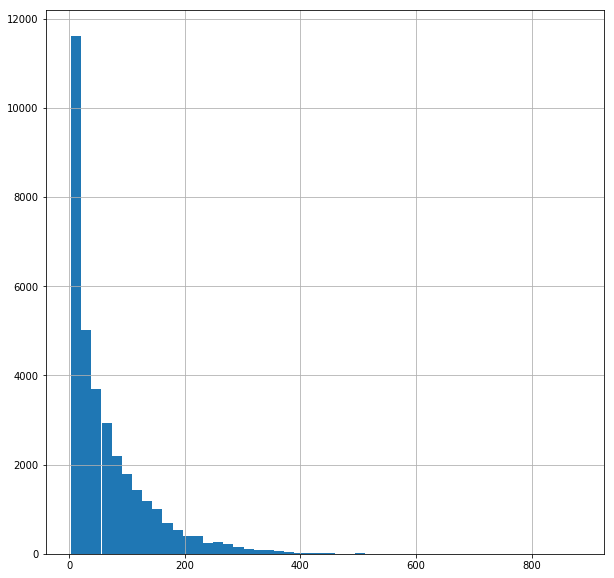

In [6]:
data["PM2.5"].hist(bins=50, figsize=(10,10))

## *Line Plot*

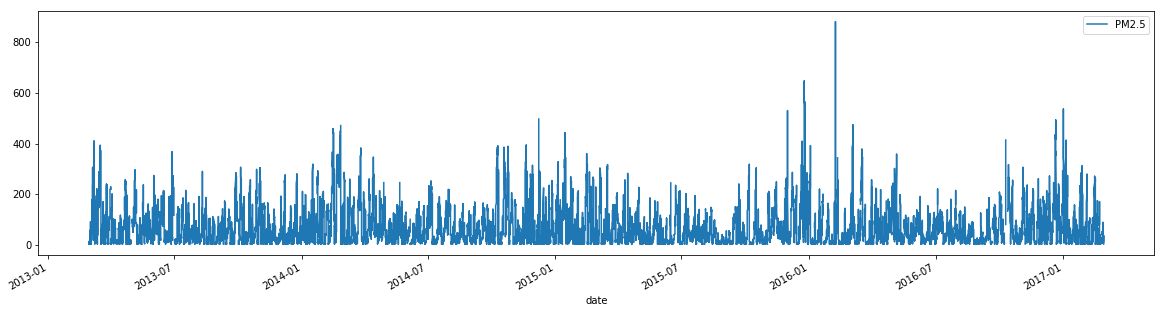

In [7]:
data.plot.line(x="date", y="PM2.5", figsize=(20,5))

## *Cat Plot*

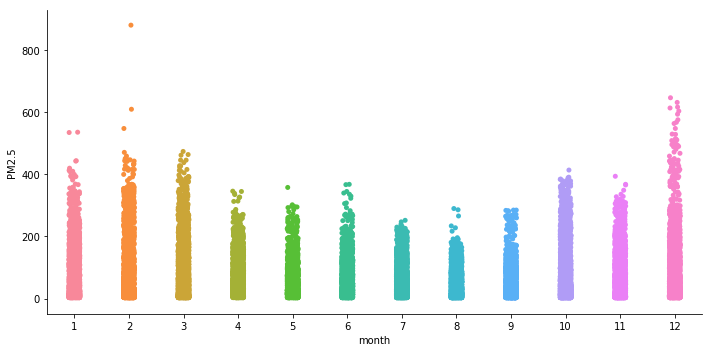

In [8]:
sns.catplot(x="month", y="PM2.5", data=data, aspect=2)

## *Box Plot*

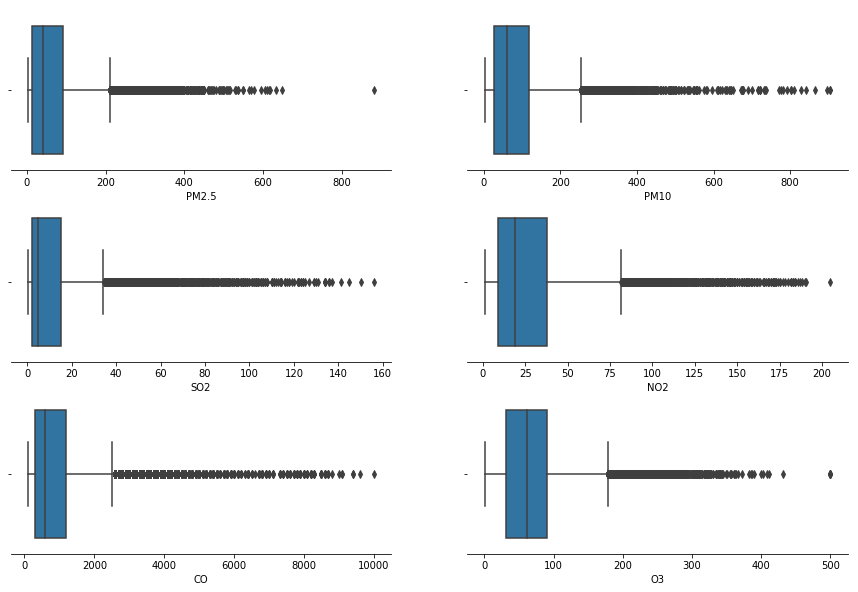

In [9]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.despine(left=True)

sns.boxplot(x=data["PM2.5"],ax=axes[0, 0])
sns.boxplot(x=data["PM10"], ax=axes[0, 1])
sns.boxplot(x=data["SO2"], ax=axes[1, 0])
sns.boxplot(x=data["NO2"], ax=axes[1, 1])
sns.boxplot(x=data["CO"], ax=axes[2, 0])
sns.boxplot(x=data["O3"], ax=axes[2, 1])

## *Heat Map*

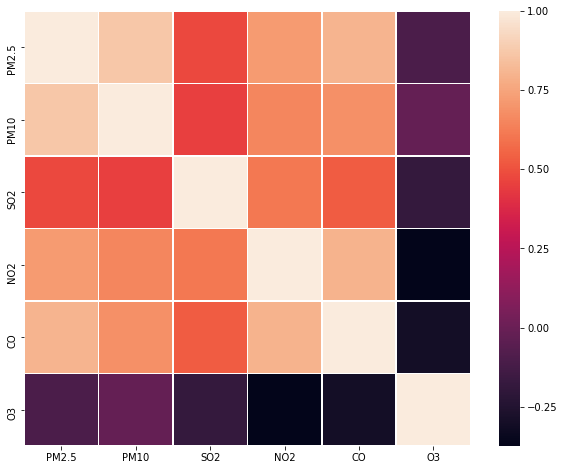

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), linewidths=.5)

## *Scatter Plot*

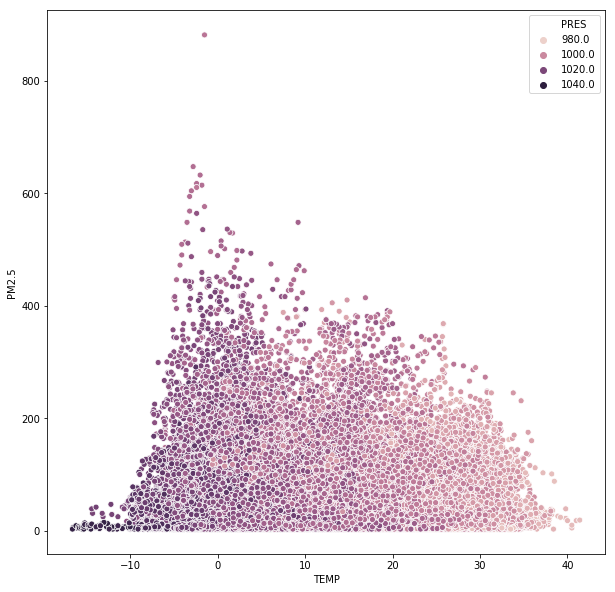

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="TEMP", y="PM2.5", hue="PRES", data=data)

## *Violin Plot*

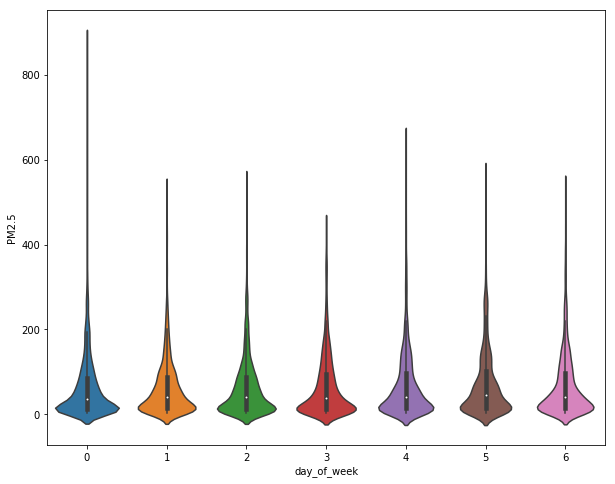

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x="day_of_week", y="PM2.5", data=data)

## *Pair Plot*

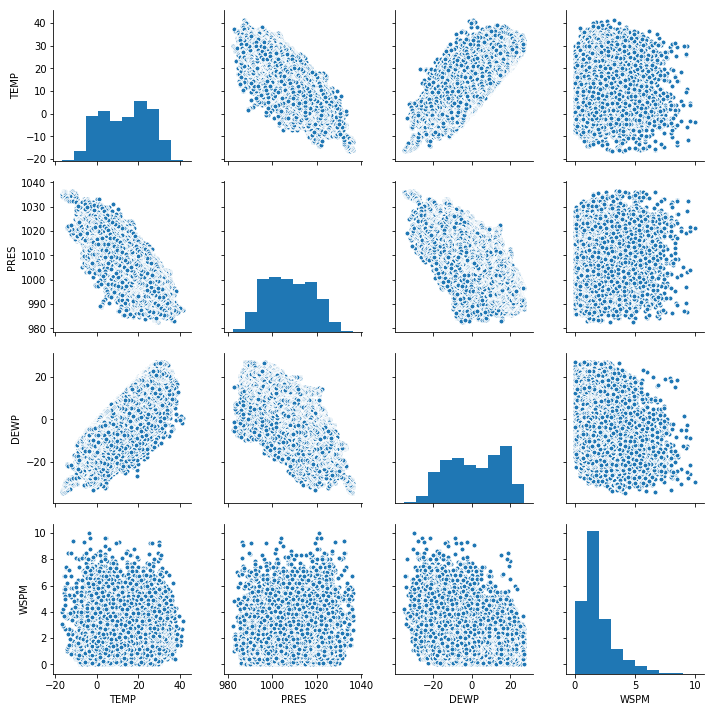

In [13]:
df = data[['TEMP','PRES','DEWP','WSPM']].copy()
df = df.dropna(thresh=4)
g = sns.PairGrid(df)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=25)
g = g.map_diag(plt.hist)